In [ ]:
# 8,982개의 훈련 샘플과 2,246개의 테스트 샘플이 있습니다:
# IMDB 영화 리뷰처럼 각 샘플은 정수 리스트입니다(단어 인덱스): 

# Mission : 벡터 입력을  46개의  토픽 클래스로 분류하는 신경망을 만들어 보십시요.  
# 단, 다음 방법을  사용하여 보십시요.  

# 1.	Embedding과 RNN 활용. 

In [2]:
# import module
from keras.datasets import reuters
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence

In [3]:
#data loading
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
#sequences pad
train_data = sequence.pad_sequences(train_data, maxlen = 8982)
test_data = sequence.pad_sequences(test_data, maxlen = 2246)

In [7]:
#Model
model = Sequential()
model.add(Embedding(10000, 46))
model.add(SimpleRNN(46))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#Training
history = model.fit(train_data, train_labels,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 470s 65ms/step - loss: -48.3476 - acc: 0.0483 - val_loss: -75.5573 - val_acc: 0.0456
Epoch 2/10
7185/7185 [==============================] - 270s 38ms/step - loss: -86.9392 - acc: 0.0487 - val_loss: -100.2996 - val_acc: 0.0456
Epoch 3/10
7185/7185 [==============================] - 272s 38ms/step - loss: -109.6194 - acc: 0.0487 - val_loss: -121.5059 - val_acc: 0.0456
Epoch 4/10
7185/7185 [==============================] - 270s 38ms/step - loss: -124.8984 - acc: 0.0487 - val_loss: -127.0156 - val_acc: 0.0456
Epoch 5/10
7185/7185 [==============================] - 271s 38ms/step - loss: -125.3801 - acc: 0.0487 - val_loss: -127.0156 - val_acc: 0.0456
Epoch 6/10
7185/7185 [==============================] - 845s 118ms/step - loss: -125.3801 - acc: 0.0487 - val_loss: -127.0156 - val_acc: 0.0456
Epoch 7/10
7185/7185 [==========================

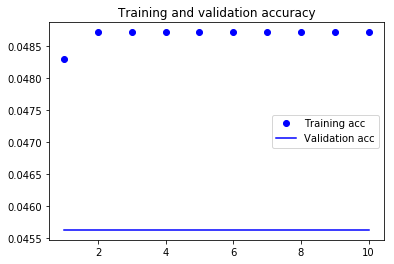

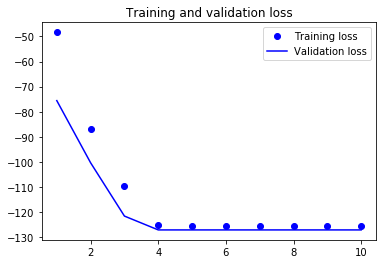

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()